✅ Loaded 20 images across 4 classes.

Classification Report:
               precision    recall  f1-score   support

        fist       1.00      1.00      1.00         2
   thumbs_up       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[2 0]
 [0 2]]


<Figure size 600x500 with 0 Axes>

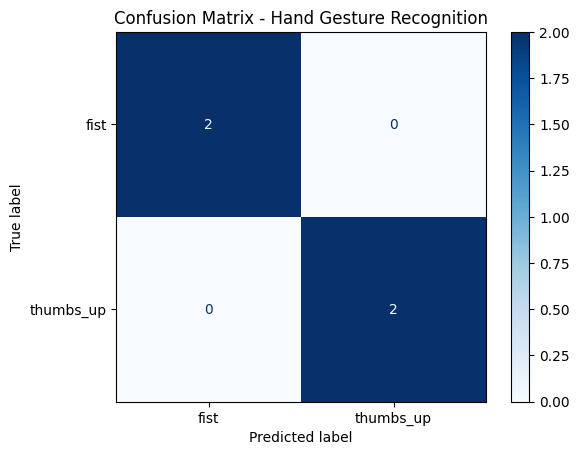

In [1]:
# 🤖 Hand Gesture Recognition using SVM (with PIL, Scikit-learn)

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# -------------------------
# 1. Load Image Dataset
# -------------------------
def load_images(base_path, image_size=(64, 64)):
    X = []
    y = []
    labels = os.listdir(base_path)
    for label in labels:
        label_folder = os.path.join(base_path, label)
        if not os.path.isdir(label_folder):
            continue
        for img_file in os.listdir(label_folder):
            if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                img_path = os.path.join(label_folder, img_file)
                try:
                    img = Image.open(img_path).convert("RGB").resize(image_size)
                    img_array = np.array(img).flatten() / 255.0
                    X.append(img_array)
                    y.append(label)
                except:
                    print(f"⚠️ Skipped unreadable image: {img_path}")
    return np.array(X), np.array(y)

# -------------------------
# 2. Load & Split Data
# -------------------------
X, y = load_images("dataset", image_size=(64, 64))
print(f"✅ Loaded {len(X)} images across {len(np.unique(y))} classes.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 3. Train Model
# -------------------------
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# -------------------------
# 4. Predict & Evaluate
# -------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------
# 5. Save Outputs
# -------------------------
os.makedirs("output", exist_ok=True)

# Save classification report
with open("output/classification_report.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))

# Save confusion matrix plot
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Hand Gesture Recognition")
plt.savefig("output/confusion_matrix.png")
plt.show()
